In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/NEU Spring 2025/CS 7150/Homework/Week 3/"

'10 Big Cats of the Wild CNN - Vijay Venkatesan.ipynb'
 big
'big cats dataset'
'big cats.zip'
'Cats Dogs Wolves CNN - Vijay Venkatesan.ipynb'
'CIFAR10 small images classification dataset CNN tensorflow datasets - Vijay Venkatesan'
'CS 7150 DL Notebook1 MNIST CNN tensorflow datasets - Vijay Venkatesan'


In [ ]:
%cd "/content/drive/MyDrive/NEU Spring 2025/CS 7150/Homework/Week 3/"

/content/drive/MyDrive/NEU Spring 2025/CS 7150/Homework/Week 3


In [ ]:
!pwd

/content/drive/MyDrive/NEU Spring 2025/CS 7150/Homework/Week 3


In [ ]:
!mv 'archive (4).zip' 'big cats.zip'

mv: cannot stat 'archive (4).zip': No such file or directory


In [ ]:
!ls

'10 Big Cats of the Wild CNN - Vijay Venkatesan.ipynb'
 big
'big cats dataset'
'big cats.zip'
'Cats Dogs Wolves CNN - Vijay Venkatesan.ipynb'
'CIFAR10 small images classification dataset CNN tensorflow datasets - Vijay Venkatesan'
'CS 7150 DL Notebook1 MNIST CNN tensorflow datasets - Vijay Venkatesan'


In [ ]:
!unzip 'big cats.zip' -d big cats dataset

Archive:  big cats.zip
caution: filename not matched:  cats
caution: filename not matched:  dataset


In [ ]:
!ls "big cats dataset"

'EfficientNetB0-10-(224 X 224)-100.00.h5'     test    valid
'MobileNetV3 small-10-(224 X 224)-95.96.h5'   train   WILDCATS.CSV


In [ ]:
train_path = "big cats dataset/train"
valid_path = "big cats dataset/valid"
test_path = "big cats dataset/test"

### Importing the Software Libraries

The following code imports some software libraries necessary to execute the project.

In [ ]:
%tensorflow_version 2.x
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
# from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
print("Import Success!")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Import Success!


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'

)

valid_batches = val_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_batches = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)



Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
print(train_batches.class_indices)

{'AFRICAN LEOPARD': 0, 'CARACAL': 1, 'CHEETAH': 2, 'CLOUDED LEOPARD': 3, 'JAGUAR': 4, 'LIONS': 5, 'OCELOT': 6, 'PUMA': 7, 'SNOW LEOPARD': 8, 'TIGER': 9}


In [ ]:
# Determine the dataset distribution

class_counts = np.bincount(train_batches.classes)

for class_label, count in zip(train_batches.class_indices.keys(), class_counts):
  print(f"{class_label} : {count}")

AFRICAN LEOPARD : 236
CARACAL : 236
CHEETAH : 235
CLOUDED LEOPARD : 229
JAGUAR : 238
LIONS : 228
OCELOT : 233
PUMA : 236
SNOW LEOPARD : 231
TIGER : 237


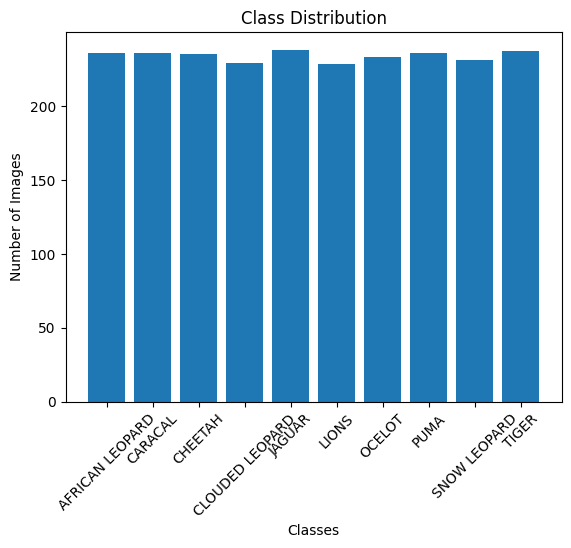

In [ ]:
class_names = list(train_batches.class_indices.keys())
plt.bar(class_names, class_counts)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

## Training the Model

Now that the model has been specified, it must be trained.




### Compiling the Model
First,the model is compiled. The performance of the model is evalued using a loss function, which increases as performance decreases. Since we are predicting a condition (yes/no), we are using cross-entropy, which is a concept from information theory. If we were instead predicting a scalar value, the correct loss function would be 'mean_squared_error'.

In [ ]:
#model.compile(Adam(lr=.00001),
model.compile(Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
print("Done")

Done


### Minimizing Loss

The model is now trained using the backpropagation algorithm to minimize the loss function. The training data will be passed into the model and evaluated using the loss function. Then, the model will be adjusted to decrease the loss.

Here we specifiy the epochs, which is the number of times we pass through the entire training set. These specifications are determined by experimentation with the goal of minimizing validation loss. If the epochs are too high, the model has overfit to the data (too specific). If the epochs are too low, the model has underfit to the data (too general). The validation loss must be compared to training loss to determine if the model is optimally fit to the data.


In [ ]:
import time

In [ ]:
start_time = time.time()

history = model.fit(
     train_batches,
     steps_per_epoch = train_batches.samples // 16,
     validation_data = valid_batches,
     validation_steps = valid_batches.samples // 16,
     epochs=25,
     verbose=1)
print("Trining Complete!")

end_time = time.time()

Epoch 1/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.4346 - loss: 2.3415 - val_accuracy: 0.7917 - val_loss: 0.6949
Epoch 2/25
  1/146 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.6875 - loss: 0.8993

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.6875 - loss: 0.8993 - val_accuracy: 1.0000 - val_loss: 0.2828
Epoch 3/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.8915 - loss: 0.3217 - val_accuracy: 0.8125 - val_loss: 0.6276
Epoch 4/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.6250 - loss: 0.8421 - val_accuracy: 1.0000 - val_loss: 0.0193
Epoch 5/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9794 - loss: 0.1290 - val_accuracy: 0.8125 - val_loss: 0.4311
Epoch 6/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0687 - val_accuracy: 0.5000 - val_loss: 0.8555
Epoch 7/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9936 - loss: 0.0487 - val_accuracy: 0.8333 - val_loss: 0.5069
Epoch 8/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0443
Epoch 9/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9998 - loss: 0.0212 - val_accuracy: 0

In [ ]:
print(f"Total training time: {end_time - start_time:.2f} seconds using a T4 GPU")

Total training time: 505.75 seconds using a T4 GPU


In [ ]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

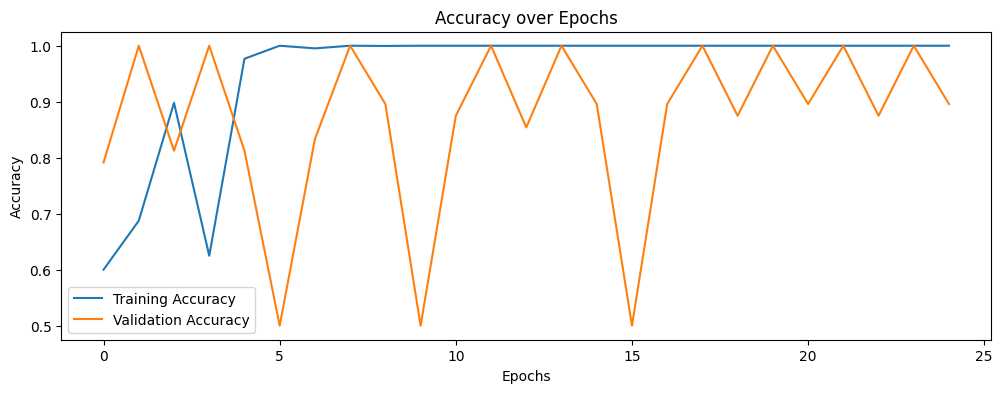

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(training_accuracy, label="Training Accuracy")
plt.plot(validation_accuracy, label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

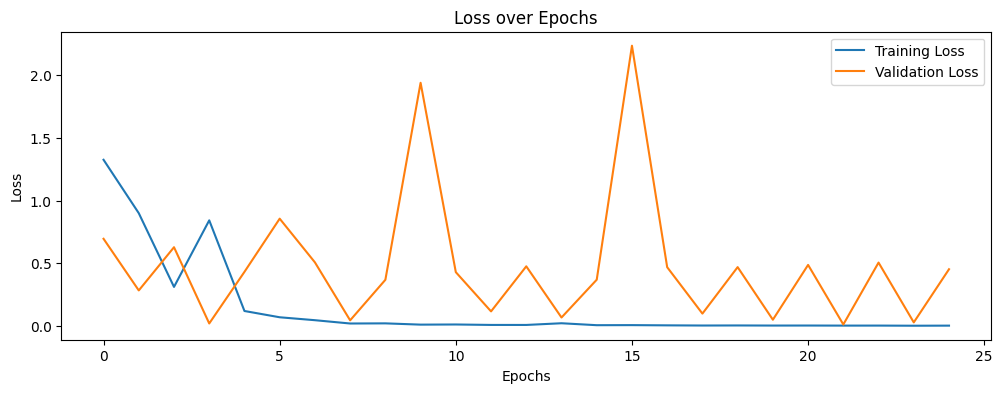

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
# plt.title("Loss over Epochs")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Testing the Model

To perform a final test of the model, the test data is fed through the model.  It is important to use data that was not used in training so we can test the performance accurately. The accuracy is calculated and a confusion matrix is generated.

### Test Accuracy

To calculate accuracy, the model is evaluated using the test generator specified earlier.

In [ ]:
test_loss, test_acc = model.evaluate(test_batches,
                                     steps=1,
                                     verbose=0)
print(test_loss)
print(test_acc)

0.4025437831878662
0.875
